In [30]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#future warning 안보이게
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [31]:
bicycle = pd.read_csv('hour.csv') #불러오기
del bicycle['instant'] #필요없는 인스턴트열 삭제

#날짜 숫자형태로
len1 = len(bicycle['dteday'])
for i in range(len1):
    bicycle['dteday'][i] = bicycle['dteday'][i].replace('-','')
bicycle

<ipython-input-31-90158d427aa1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicycle['dteday'][i] = bicycle['dteday'][i].replace('-','')


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,20110101,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,20110101,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,20110101,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,20110101,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,20110101,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,20121231,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,20121231,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,20121231,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,20121231,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [32]:
#범주형은 오브젝트로 바꿔주기
bicycle['season'] = bicycle['season'].astype(object)
bicycle['yr'] = bicycle['yr'].astype(object)
bicycle['mnth'] = bicycle['mnth'].astype(object)
bicycle['hr'] = bicycle['hr'].astype(object)
bicycle['holiday'] = bicycle['holiday'].astype(object)
bicycle['weekday'] = bicycle['weekday'].astype(object)
bicycle['workingday'] = bicycle['workingday'].astype(object)
bicycle['weathersit'] = bicycle['weathersit'].astype(object)

['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'hum', 'windspeed', 'atemp']

PCA 변환 결과 :principalDf 
               0         1         2
0     -1.721594 -1.730119 -0.562297
1     -1.853220 -1.690472 -0.610038
2     -1.853220 -1.690472 -0.610038
3     -1.698308 -1.511419 -0.782180
4     -1.698308 -1.511419 -0.782180
...         ...       ...       ...
17374 -1.743006 -0.005734 -0.390152
17375 -1.743006 -0.005734 -0.390152
17376 -1.743006 -0.005734 -0.390152
17377 -1.656124 -0.036471 -0.704379
17378 -1.691053 -0.364521 -0.374555

[17379 rows x 3 columns]

eigen vector
 [[ 0.70454984 -0.07487384 -0.03863155  0.7046354 ]
 [-0.0020562  -0.70320949  0.71017914 -0.03373089]
 [ 0.06758911  0.70701166  0.70245635  0.04605751]]

설명력
 [1.99660139 1.29035976 0.70174198]
기존 분산합 :
temp         0.037078
hum          0.037222
windspeed    0.014967
atemp        0.029532
dtype: float64
주성분 분산합 :
0    1.996601
1    1.290360
2    0.701742
dtype: float6

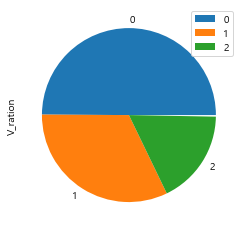

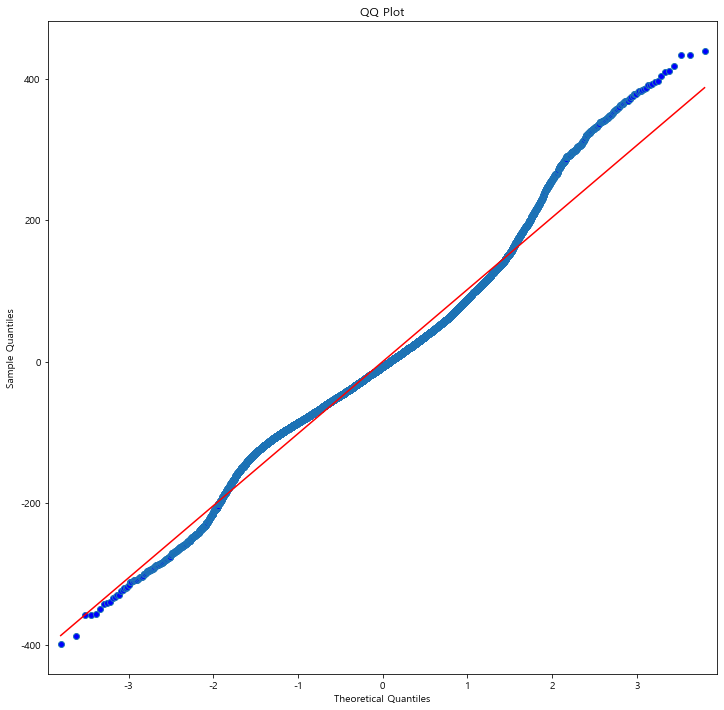

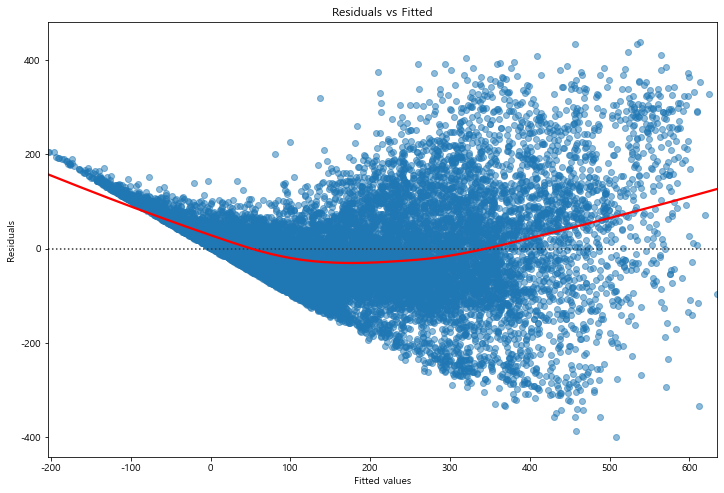

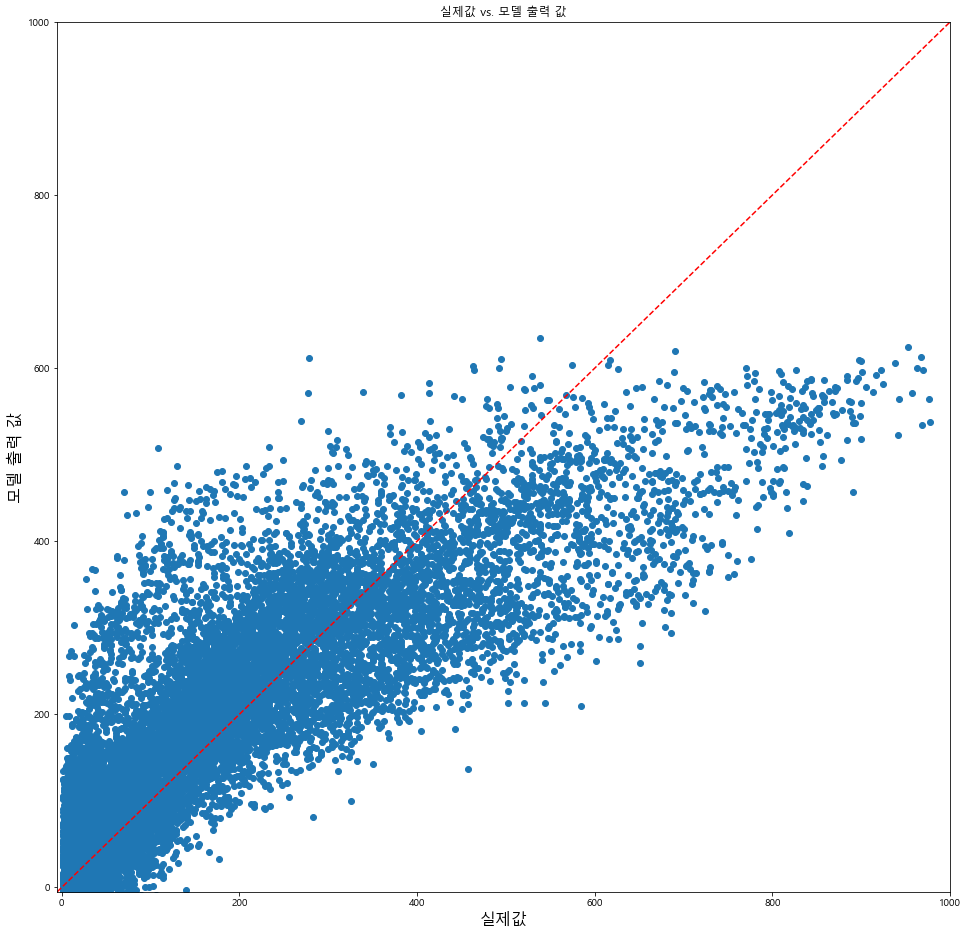

Training MSE: 10375.048
Training RMSE: 101.858
Training MAE: 75.593
Training MAPE: 850.225
Training R2: 0.687
---------------------------------------------------------
Testing MSE: 10129.109
Testing RMSE: 100.643
Testing MAE: 74.874
Testing MAPE: 852.101
Testing R2: 0.683
---------------------------------------------------------
atemp 제외후, PCA 3/3개 축


In [57]:
'''atemp안빼고 PCA 해서 하나제외버젼'''
#명목 독립 변수 인덱스 구분
category_feature = [col for col in bicycle.columns if bicycle[col].dtype == "object"]
print(category_feature)

numerical_feature = list(set(bicycle.columns) - set(category_feature) - set(['cnt','casual','registered']))
# numerical_feature = [col for col in bicycle.columns if bicycle[col].dtype == "float64"] 방법2
print(numerical_feature)

#종속, 독립변수 나누기
target = bicycle.iloc[:,13:16] 
data = bicycle.iloc[:,0:13] #이름정해진 후 숫자로 인덱스하는법

def oneHot(onehot_column_name):
    global data
    np.array(data[onehot_column_name]).reshape(-1,1)
    onehot_encoder = OneHotEncoder()
    temporary=onehot_encoder.fit_transform(np.array(data[onehot_column_name]).reshape(-1,1))
    temp_name = onehot_encoder.categories_[0].tolist()
    for i in range(len(temp_name)):
        temp_name[i]=str(temp_name[i])
        temp_name[i]=onehot_column_name+ ':'+ temp_name[i]
    temporary2 = pd.DataFrame(temporary.toarray(),columns=temp_name)
    temporary2 = temporary2.drop(temporary2.columns[len(temporary2.columns)-1], axis =1) #다중 공선성 막기위해 하나는 없애
    data = data.drop(onehot_column_name,axis=1)
    data = pd.concat([data, temporary2], axis=1)
    return data

#뺼항목
data = data.drop('dteday', axis=1)

'''정규화 및 PCA'''
# print(f'기존 연속 독립 변수 : data[numerical_feature] \n {data[numerical_feature]}')
data_num = data[numerical_feature].values
data_num = StandardScaler().fit_transform(data_num)
# print(f'정규화 결과 : data_num \n {data_num}')

pca = PCA(n_components=3) #PCA 몇개 사용할지 
'''여기변경 포인트'''

principalComponents = pca.fit_transform(data_num)
principalDf = pd.DataFrame(data = principalComponents)
print(f'\nPCA 변환 결과 :principalDf \n {principalDf}')

# pca의 eigen_vector
print(f'\neigen vector\n {pca.components_}')

#설명력
print(f'\n설명력\n {pca.explained_variance_}')
ratio = pca.explained_variance_ratio_
df_v = pd.DataFrame(ratio, columns=['V_ration'])
df_v.plot.pie(y='V_ration')
# df_v

'''기타 참고자료'''
#기존 분산합
print(f'기존 분산합 :\n{data[numerical_feature].var()}')
#주성분 분산합
print(f'주성분 분산합 :\n{principalDf.var()}')
#주성분 점수간의 상관계수 = 0
print(principalDf.corr())
principalDf = principalDf.add_prefix('PCA:')
data = pd.concat([data.drop(numerical_feature, axis=1), principalDf], axis=1)

'''범주형 onehot 처리, 이미뺸 항목 주의'''
oneHot('season')
oneHot('mnth')
oneHot('hr')
oneHot('weekday')
oneHot('weathersit')

'''실제 모델학습'''
X = data
y= pd.DataFrame(target[target.columns[2]])

#알고리즘 이용위해 숫자화
for col in X.columns:
    X[col] = X[col].astype(float)

#시험, 학습 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

#상수 베타0 만들어주기  및 학습
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

#QQ plot 선형성 확인
model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#잔차 검증
model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#결과 출력
print(model_trained.summary())
'''workingday holiday는 넣으나 빼나 차이 없다.'''
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 1000], [-5, 1000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.show()

# 위에서도 상수 Beta0 빼면 이것도 빼야해
X_test = sm.add_constant(X_test) 

y_test_pred = model_trained.predict(X_test)
y_test_pred.head()
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')

['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'hum', 'windspeed', 'atemp']

PCA 변환 결과 :principalDf 
               0         1         2
0     -1.721594 -1.730119 -0.562297
1     -1.853220 -1.690472 -0.610038
2     -1.853220 -1.690472 -0.610038
3     -1.698308 -1.511419 -0.782180
4     -1.698308 -1.511419 -0.782180
...         ...       ...       ...
17374 -1.743006 -0.005734 -0.390152
17375 -1.743006 -0.005734 -0.390152
17376 -1.743006 -0.005734 -0.390152
17377 -1.656124 -0.036471 -0.704379
17378 -1.691053 -0.364521 -0.374555

[17379 rows x 3 columns]

eigen vector
 [[ 0.70454984 -0.07487384 -0.03863155  0.7046354 ]
 [-0.0020562  -0.70320949  0.71017914 -0.03373089]
 [ 0.06758911  0.70701166  0.70245635  0.04605751]]

설명력
 [1.99660139 1.29035976 0.70174198]
기존 분산합 :
temp         0.037078
hum          0.037222
windspeed    0.014967
atemp        0.029532
dtype: float64
주성분 분산합 :
0    1.996601
1    1.290360
2    0.701742
dtype: float6

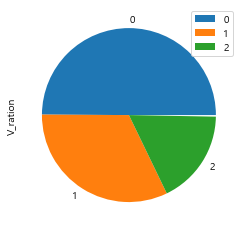

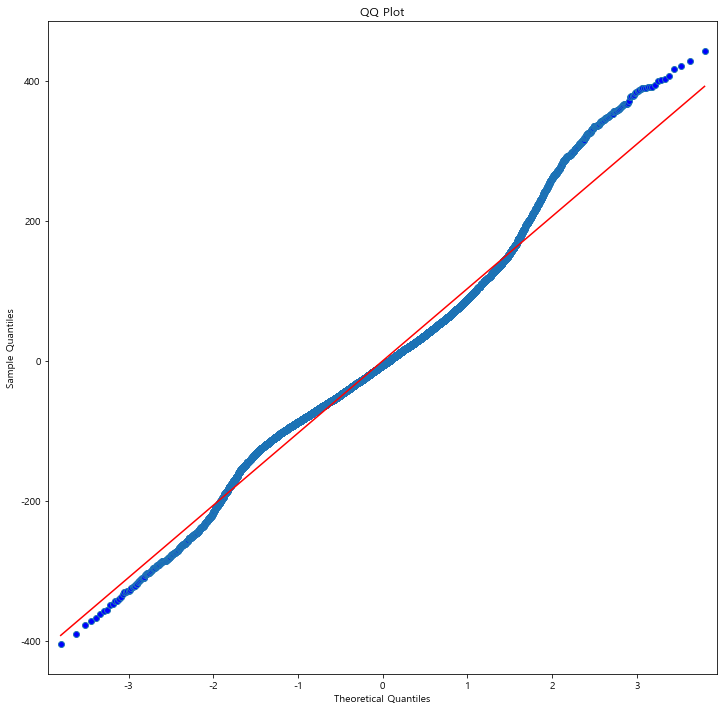

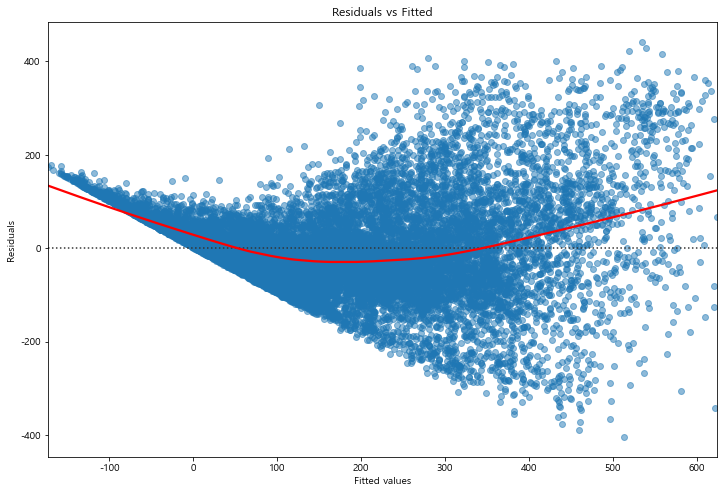

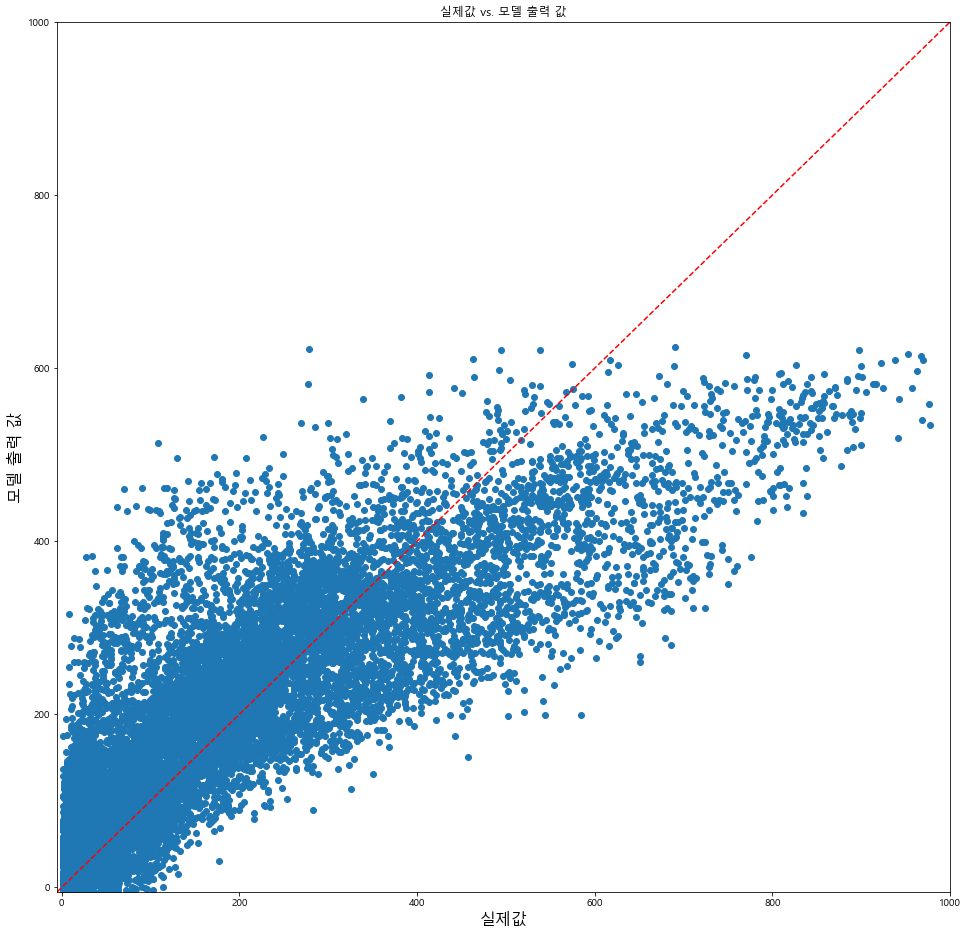

Training MSE: 10630.227
Training RMSE: 103.103
Training MAE: 76.631
Training MAPE: 847.675
Training R2: 0.679
---------------------------------------------------------
Testing MSE: 10395.971
Testing RMSE: 101.961
Testing MAE: 75.797
Testing MAPE: 849.513
Testing R2: 0.675
---------------------------------------------------------


In [59]:
'''atemp안빼고 PCA 해서 하나제외버젼 - p-value 0.05이상 제외'''
#명목 독립 변수 인덱스 구분
category_feature = [col for col in bicycle.columns if bicycle[col].dtype == "object"]
print(category_feature)

numerical_feature = list(set(bicycle.columns) - set(category_feature) - set(['cnt','casual','registered']))
# numerical_feature = [col for col in bicycle.columns if bicycle[col].dtype == "float64"] 방법2
print(numerical_feature)

#종속, 독립변수 나누기
target = bicycle.iloc[:,13:16] 
data = bicycle.iloc[:,0:13] #이름정해진 후 숫자로 인덱스하는법

def oneHot(onehot_column_name):
    global data
    np.array(data[onehot_column_name]).reshape(-1,1)
    onehot_encoder = OneHotEncoder()
    temporary=onehot_encoder.fit_transform(np.array(data[onehot_column_name]).reshape(-1,1))
    temp_name = onehot_encoder.categories_[0].tolist()
    for i in range(len(temp_name)):
        temp_name[i]=str(temp_name[i])
        temp_name[i]=onehot_column_name+ ':'+ temp_name[i]
    temporary2 = pd.DataFrame(temporary.toarray(),columns=temp_name)
    temporary2 = temporary2.drop(temporary2.columns[len(temporary2.columns)-1], axis =1) #다중 공선성 막기위해 하나는 없애
    data = data.drop(onehot_column_name,axis=1)
    data = pd.concat([data, temporary2], axis=1)
    return data

#뺼항목
data = data.drop(['dteday','weathersit','workingday'], axis=1)

'''정규화 및 PCA'''
# print(f'기존 연속 독립 변수 : data[numerical_feature] \n {data[numerical_feature]}')
data_num = data[numerical_feature].values
data_num = StandardScaler().fit_transform(data_num)
# print(f'정규화 결과 : data_num \n {data_num}')

pca = PCA(n_components=3) #PCA 몇개 사용할지 
'''여기변경 포인트'''

principalComponents = pca.fit_transform(data_num)
principalDf = pd.DataFrame(data = principalComponents)
print(f'\nPCA 변환 결과 :principalDf \n {principalDf}')

# pca의 eigen_vector
print(f'\neigen vector\n {pca.components_}')

#설명력
print(f'\n설명력\n {pca.explained_variance_}')
ratio = pca.explained_variance_ratio_
df_v = pd.DataFrame(ratio, columns=['V_ration'])
df_v.plot.pie(y='V_ration')
# df_v

'''기타 참고자료'''
#기존 분산합
print(f'기존 분산합 :\n{data[numerical_feature].var()}')
#주성분 분산합
print(f'주성분 분산합 :\n{principalDf.var()}')
#주성분 점수간의 상관계수 = 0
print(principalDf.corr())
principalDf = principalDf.add_prefix('PCA:')
data = pd.concat([data.drop(numerical_feature, axis=1), principalDf], axis=1)

'''범주형 onehot 처리, 이미뺸 항목 주의'''
oneHot('season')
oneHot('mnth')
oneHot('hr')
oneHot('weekday')
# oneHot('weathersit')

'''실제 모델학습'''
X = data.drop(['mnth:1','mnth:2','mnth:4','mnth:6','mnth:7','mnth:11','hr:6','weekday:1','weekday:2','weekday:3','weekday:4','weekday:5'], axis=1)
y= pd.DataFrame(target[target.columns[2]])

#알고리즘 이용위해 숫자화
for col in X.columns:
    X[col] = X[col].astype(float)

#시험, 학습 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

#상수 베타0 만들어주기  및 학습
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

#QQ plot 선형성 확인
model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#잔차 검증
model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#결과 출력
print(model_trained.summary())
'''workingday holiday는 넣으나 빼나 차이 없다.'''
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 1000], [-5, 1000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.show()

# 위에서도 상수 Beta0 빼면 이것도 빼야해
X_test = sm.add_constant(X_test) 

y_test_pred = model_trained.predict(X_test)
y_test_pred.head()
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')

['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'hum', 'windspeed', 'atemp']
기존 연속 독립 변수 : data[numerical_feature] 
        temp   hum  windspeed
0      0.24  0.81     0.0000
1      0.22  0.80     0.0000
2      0.22  0.80     0.0000
3      0.24  0.75     0.0000
4      0.24  0.75     0.0000
...     ...   ...        ...
17374  0.26  0.60     0.1642
17375  0.26  0.60     0.1642
17376  0.26  0.60     0.1642
17377  0.26  0.56     0.1343
17378  0.26  0.65     0.1343

[17379 rows x 3 columns]
정규화 결과 : data_num 
 [[-1.33464759  0.9473725  -1.55388851]
 [-1.4385164   0.89553869 -1.55388851]
 [-1.4385164   0.89553869 -1.55388851]
 ...
 [-1.23077877 -0.14113744 -0.21169121]
 [-1.23077877 -0.34847267 -0.45609864]
 [-1.23077877  0.11803159 -0.45609864]]

PCA 변환 결과 :principalDf 
               0         1         2
0     -1.904298  1.001198 -0.681630
1     -1.879323  1.098420 -0.739937
2     -1.879323  1.098420 -0.739937
3     -1.683015  0.979738 -

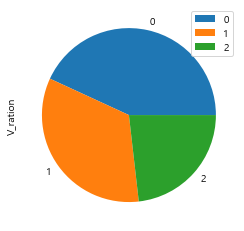

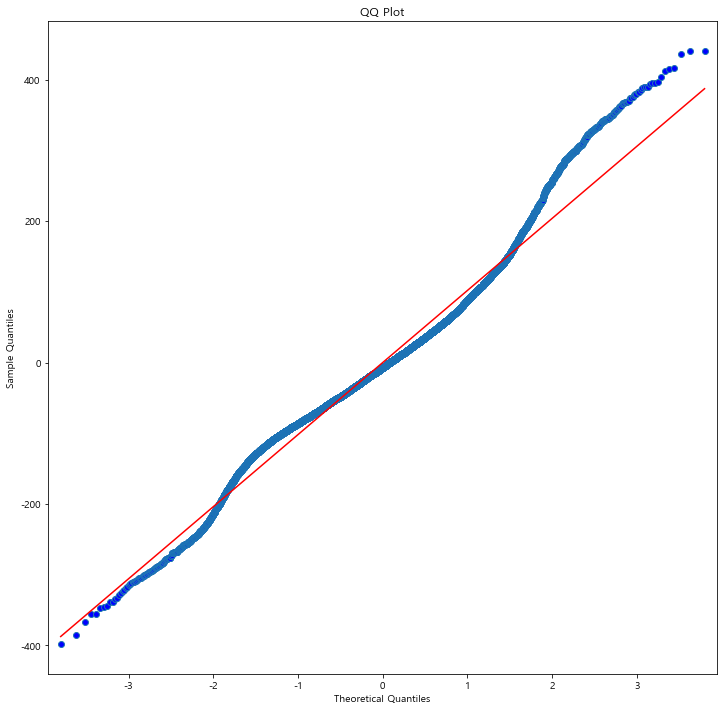

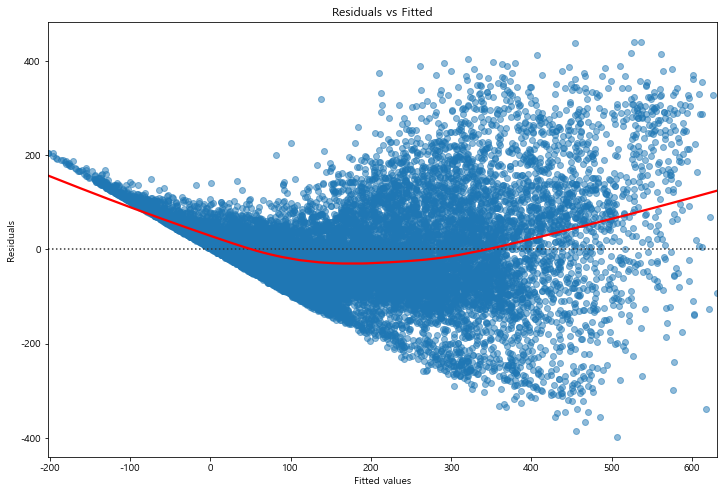

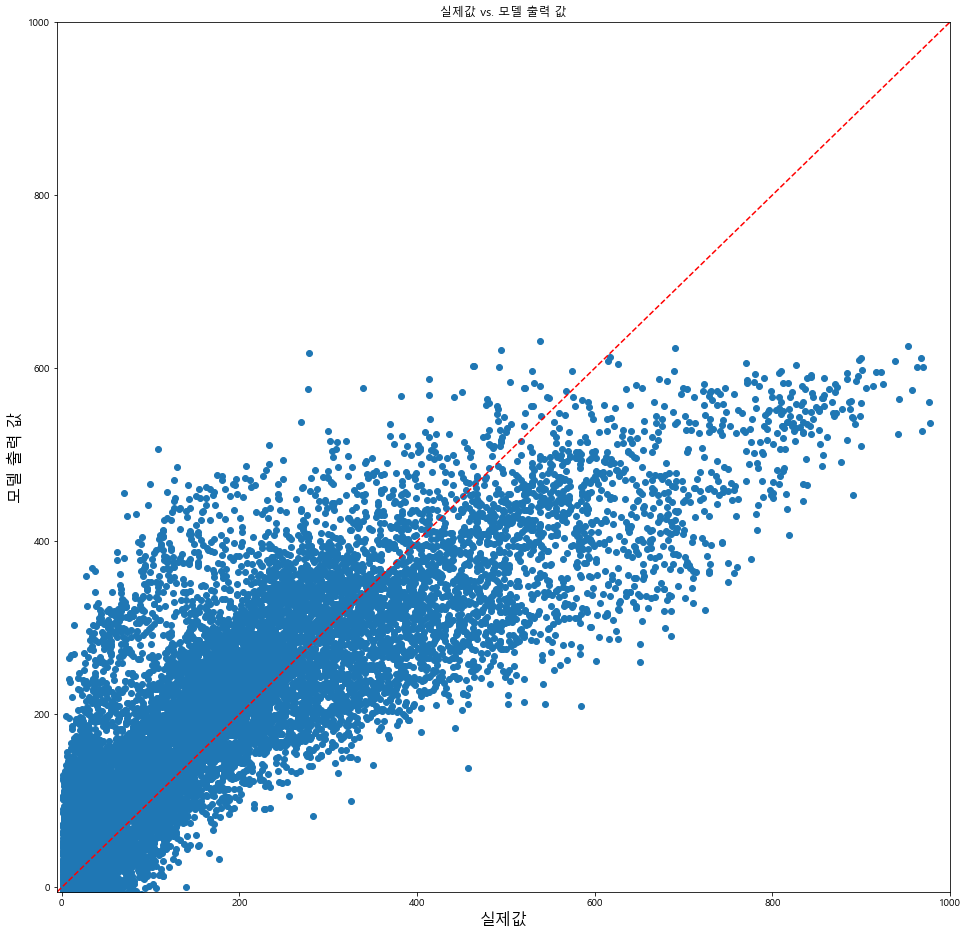

Training MSE: 10384.644
Training RMSE: 101.905
Training MAE: 75.579
Training MAPE: 850.081
Training R2: 0.687
---------------------------------------------------------
Testing MSE: 10142.494
Testing RMSE: 100.710
Testing MAE: 74.878
Testing MAPE: 851.850
Testing R2: 0.683
---------------------------------------------------------
atemp 제외후, PCA 3/3개 축


In [54]:
'''temp atemp 중 atemp삭제 후 PCA 수행하나 결국 3개 다씀'''
#명목 독립 변수 인덱스 구분
category_feature = [col for col in bicycle.columns if bicycle[col].dtype == "object"]
print(category_feature)

numerical_feature = list(set(bicycle.columns) - set(category_feature) - set(['cnt','casual','registered']))
# numerical_feature = [col for col in bicycle.columns if bicycle[col].dtype == "float64"] 방법2
print(numerical_feature)

#종속, 독립변수 나누기
target = bicycle.iloc[:,13:16] 
data = bicycle.iloc[:,0:13] #이름정해진 후 숫자로 인덱스하는법

def oneHot(onehot_column_name):
    global data
    np.array(data[onehot_column_name]).reshape(-1,1)
    onehot_encoder = OneHotEncoder()
    temporary=onehot_encoder.fit_transform(np.array(data[onehot_column_name]).reshape(-1,1))
    temp_name = onehot_encoder.categories_[0].tolist()
    for i in range(len(temp_name)):
        temp_name[i]=str(temp_name[i])
        temp_name[i]=onehot_column_name+ ':'+ temp_name[i]
    temporary2 = pd.DataFrame(temporary.toarray(),columns=temp_name)
    temporary2 = temporary2.drop(temporary2.columns[len(temporary2.columns)-1], axis =1) #다중 공선성 막기위해 하나는 없애
    data = data.drop(onehot_column_name,axis=1)
    data = pd.concat([data, temporary2], axis=1)
    return data

#뺼항목
data = data.drop(['dteday','atemp'], axis=1)

'''정규화 및 PCA'''
numerical_feature = list(set(numerical_feature)-set(['atemp']))
# print(f'기존 연속 독립 변수 : data[numerical_feature] \n {data[numerical_feature]}')
data_num = data[numerical_feature].values
data_num = StandardScaler().fit_transform(data_num)
# print(f'정규화 결과 : data_num \n {data_num}')
pca = PCA(n_components=3) #PCA 몇개 사용할지
principalComponents = pca.fit_transform(data_num)
principalDf = pd.DataFrame(data = principalComponents)
print(f'\nPCA 변환 결과 :principalDf \n {principalDf}')

# pca의 eigen_vector
print(f'\neigen vector\n {pca.components_}')

#설명력
print(f'\n설명력\n {pca.explained_variance_}')
ratio = pca.explained_variance_ratio_
df_v = pd.DataFrame(ratio, columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v


'''기타 참고자료'''
#기존 분산합
print(f'기존 분산합 :\n{data[numerical_feature].var()}')
#주성분 분산합
print(f'주성분 분산합 :\n{principalDf.var()}')
#주성분 점수간의 상관계수 = 0
print(principalDf.corr())
principalDf = principalDf.add_prefix('PCA:')
data = pd.concat([data.drop(numerical_feature, axis=1), principalDf], axis=1)

'''범주형 onehot 처리, 이미뺸 항목 주의'''
oneHot('season')
oneHot('mnth')
oneHot('hr')
oneHot('weekday')
oneHot('weathersit')



'''실제 모델학습'''
X = data
y= pd.DataFrame(target[target.columns[2]])

#알고리즘 이용위해 숫자화
for col in X.columns:
    X[col] = X[col].astype(float)

#시험, 학습 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

#상수 베타0 만들어주기  및 학습
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

#QQ plot 선형성 확인
model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#잔차 검증
model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#결과 출력
print(model_trained.summary())
'''workingday holiday는 넣으나 빼나 차이 없다.'''
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 1000], [-5, 1000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.show()

# 위에서도 상수 Beta0 빼면 이것도 빼야해
X_test = sm.add_constant(X_test) 

y_test_pred = model_trained.predict(X_test)
y_test_pred.head()
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')
print('atemp 제외후, PCA 3/3개 축')

['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'hum', 'windspeed', 'atemp']
기존 연속 독립 변수 : data[numerical_feature] 
        temp   hum  windspeed
0      0.24  0.81     0.0000
1      0.22  0.80     0.0000
2      0.22  0.80     0.0000
3      0.24  0.75     0.0000
4      0.24  0.75     0.0000
...     ...   ...        ...
17374  0.26  0.60     0.1642
17375  0.26  0.60     0.1642
17376  0.26  0.60     0.1642
17377  0.26  0.56     0.1343
17378  0.26  0.65     0.1343

[17379 rows x 3 columns]
정규화 결과 : data_num 
 [[-1.33464759  0.9473725  -1.55388851]
 [-1.4385164   0.89553869 -1.55388851]
 [-1.4385164   0.89553869 -1.55388851]
 ...
 [-1.23077877 -0.14113744 -0.21169121]
 [-1.23077877 -0.34847267 -0.45609864]
 [-1.23077877  0.11803159 -0.45609864]]

PCA 변환 결과 :principalDf 
               0         1         2
0     -1.904298  1.001198 -0.681630
1     -1.879323  1.098420 -0.739937
2     -1.879323  1.098420 -0.739937
3     -1.683015  0.979738 -

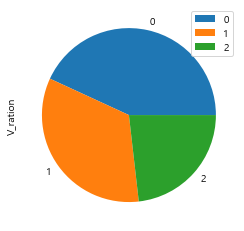

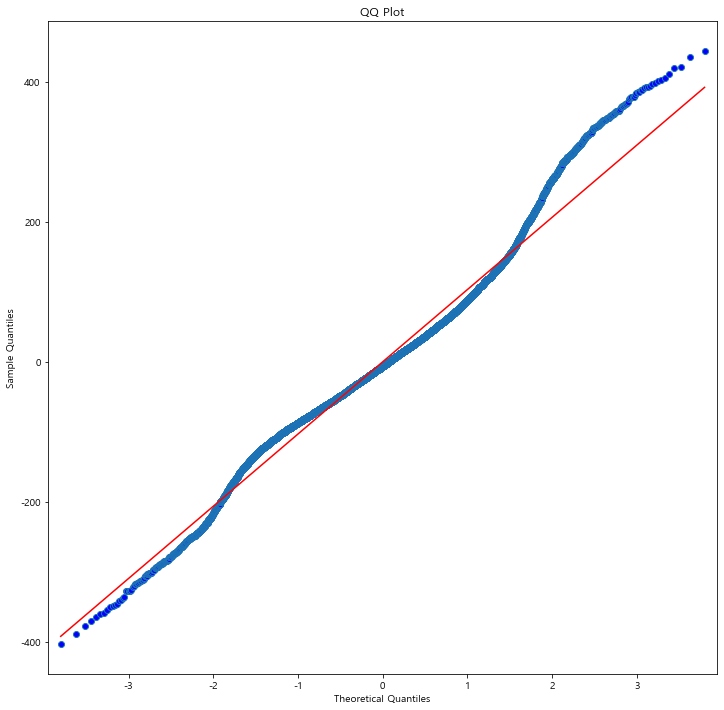

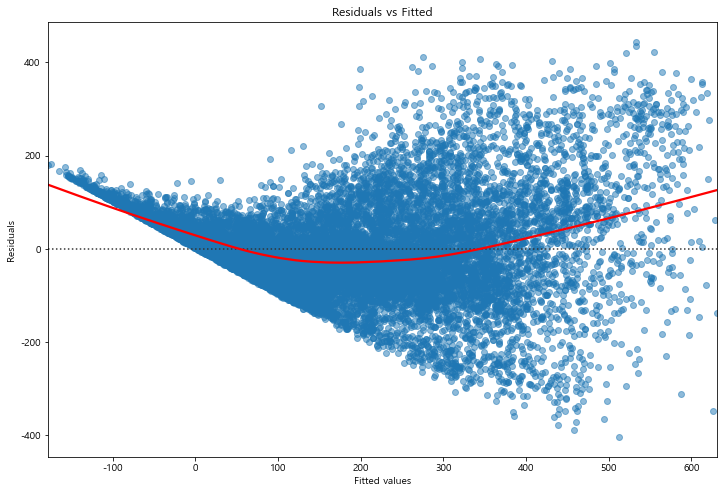

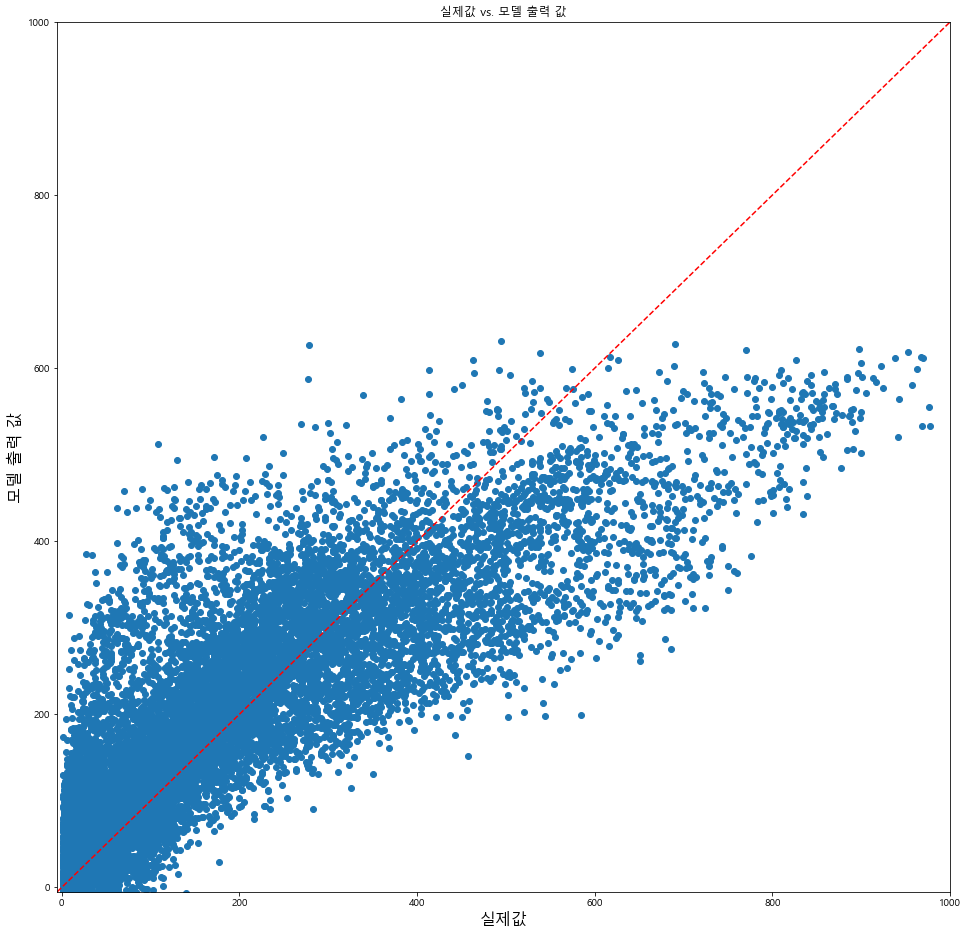

Training MSE: 10645.069
Training RMSE: 103.175
Training MAE: 76.633
Training MAPE: 847.491
Training R2: 0.679
---------------------------------------------------------
Testing MSE: 10413.340
Testing RMSE: 102.046
Testing MAE: 75.819
Testing MAPE: 849.275
Testing R2: 0.674
---------------------------------------------------------


In [53]:
'''temp atemp 중 atemp삭제 후 PCA 수행하나 결국 3개 다씀- p-value 0.05이상 제외'''
#명목 독립 변수 인덱스 구분
category_feature = [col for col in bicycle.columns if bicycle[col].dtype == "object"]
print(category_feature)

numerical_feature = list(set(bicycle.columns) - set(category_feature) - set(['cnt','casual','registered']))
# numerical_feature = [col for col in bicycle.columns if bicycle[col].dtype == "float64"] 방법2
print(numerical_feature)

#종속, 독립변수 나누기
target = bicycle.iloc[:,13:16] 
data = bicycle.iloc[:,0:13] #이름정해진 후 숫자로 인덱스하는법

def oneHot(onehot_column_name):
    global data
    np.array(data[onehot_column_name]).reshape(-1,1)
    onehot_encoder = OneHotEncoder()
    temporary=onehot_encoder.fit_transform(np.array(data[onehot_column_name]).reshape(-1,1))
    temp_name = onehot_encoder.categories_[0].tolist()
    for i in range(len(temp_name)):
        temp_name[i]=str(temp_name[i])
        temp_name[i]=onehot_column_name+ ':'+ temp_name[i]
    temporary2 = pd.DataFrame(temporary.toarray(),columns=temp_name)
    temporary2 = temporary2.drop(temporary2.columns[len(temporary2.columns)-1], axis =1) #다중 공선성 막기위해 하나는 없애
    data = data.drop(onehot_column_name,axis=1)
    data = pd.concat([data, temporary2], axis=1)
    return data

#뺼항목
data = data.drop(['dteday','atemp','weathersit','workingday'], axis=1)

'''정규화 및 PCA'''
numerical_feature = list(set(numerical_feature)-set(['atemp']))
# print(f'기존 연속 독립 변수 : data[numerical_feature] \n {data[numerical_feature]}')
data_num = data[numerical_feature].values
data_num = StandardScaler().fit_transform(data_num)
# print(f'정규화 결과 : data_num \n {data_num}')
pca = PCA(n_components=3) #PCA 몇개 사용할지
principalComponents = pca.fit_transform(data_num)
principalDf = pd.DataFrame(data = principalComponents)
print(f'\nPCA 변환 결과 :principalDf \n {principalDf}')

# pca의 eigen_vector
print(f'\neigen vector\n {pca.components_}')

#설명력
print(f'\n설명력\n {pca.explained_variance_}')
ratio = pca.explained_variance_ratio_
df_v = pd.DataFrame(ratio, columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v


'''기타 참고자료'''
#기존 분산합
print(f'기존 분산합 :\n{data[numerical_feature].var()}')
#주성분 분산합
print(f'주성분 분산합 :\n{principalDf.var()}')
#주성분 점수간의 상관계수 = 0
print(principalDf.corr())
principalDf = principalDf.add_prefix('PCA:')
data = pd.concat([data.drop(numerical_feature, axis=1), principalDf], axis=1)

'''범주형 onehot 처리, 이미뺸 항목 주의'''
oneHot('season')
oneHot('mnth')
oneHot('hr')
oneHot('weekday')
# oneHot('weathersit')



'''실제 모델학습'''
X = data.drop(['mnth:1','mnth:2','mnth:4','mnth:6','mnth:7','mnth:11','hr:6','weekday:1','weekday:2','weekday:3','weekday:4','weekday:5'], axis=1)
y= pd.DataFrame(target[target.columns[2]])

#알고리즘 이용위해 숫자화
for col in X.columns:
    X[col] = X[col].astype(float)

#시험, 학습 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

#상수 베타0 만들어주기  및 학습
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

#QQ plot 선형성 확인
model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#잔차 검증
model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#결과 출력
print(model_trained.summary())
'''workingday holiday는 넣으나 빼나 차이 없다.'''
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 1000], [-5, 1000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.show()

# 위에서도 상수 Beta0 빼면 이것도 빼야해
X_test = sm.add_constant(X_test) 

y_test_pred = model_trained.predict(X_test)
y_test_pred.head()
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')

['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'hum', 'windspeed', 'atemp']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     813.8
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:39:34   Log-Likelihood:                -84188.
No. Observations:               13903   AIC:                         1.684e+05
Df Residuals:                   13866   BIC:                         1.687e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

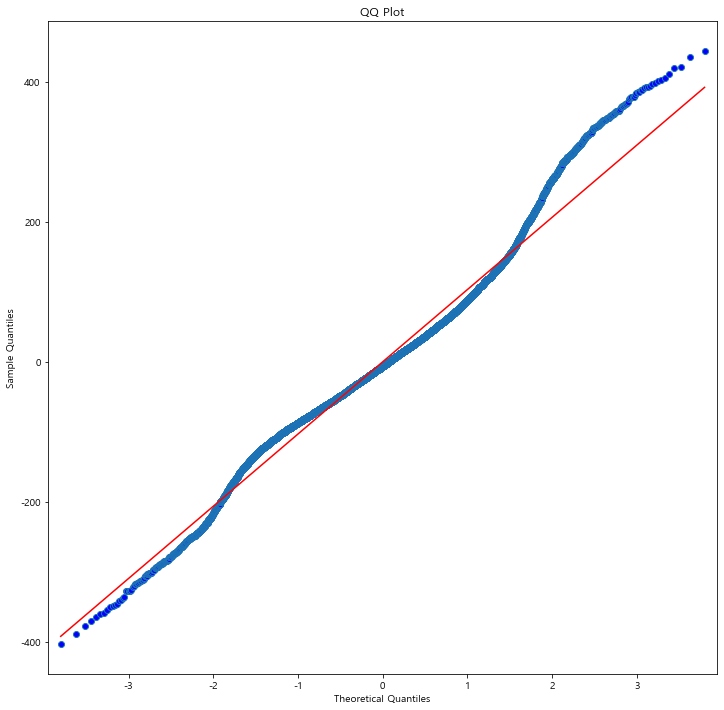

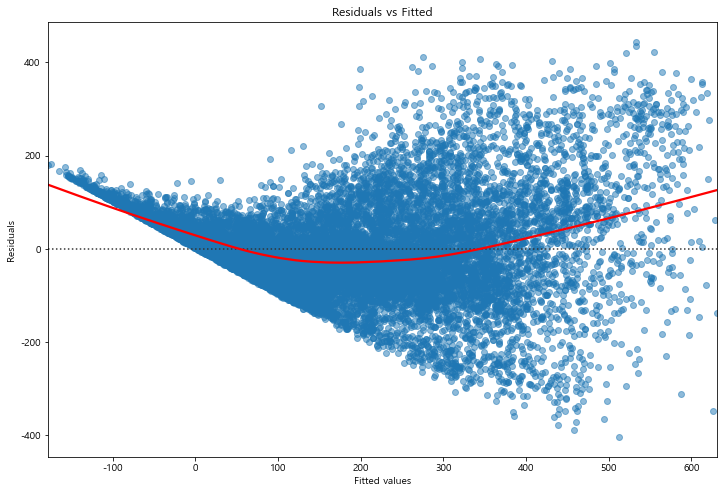

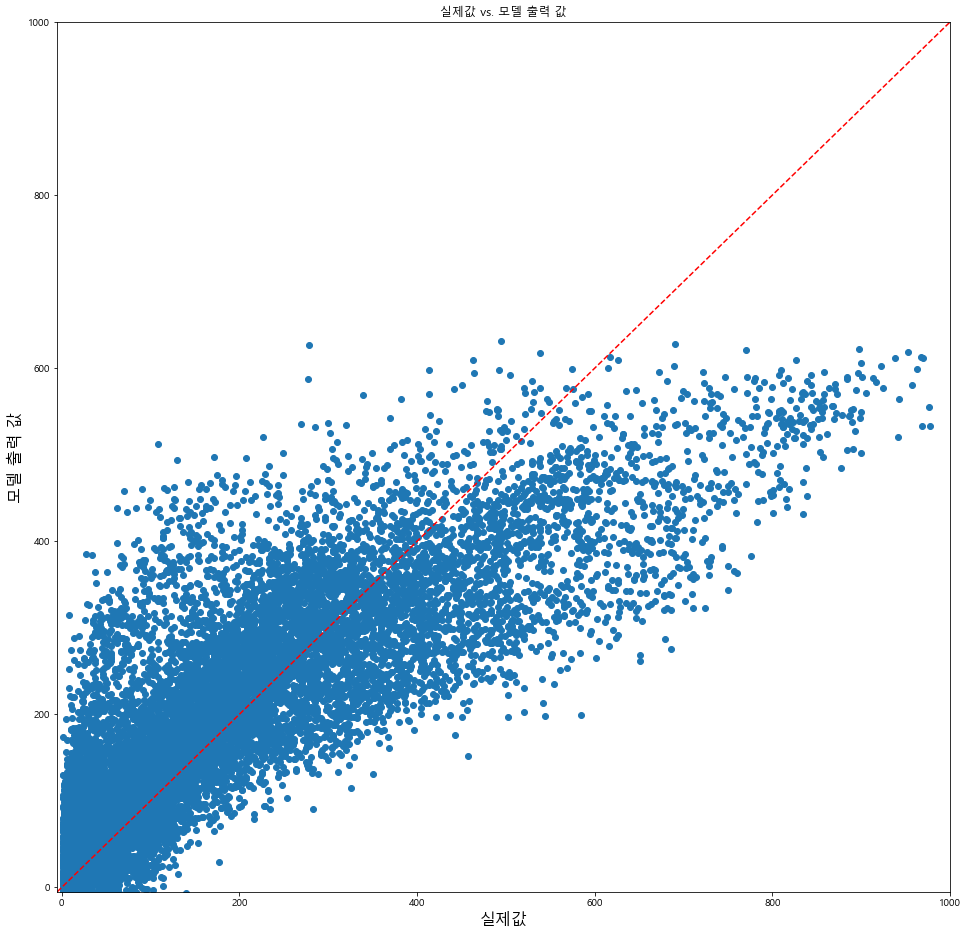

Training MSE: 10645.069
Training RMSE: 103.175
Training MAE: 76.633
Training MAPE: 847.491
Training R2: 0.679
---------------------------------------------------------
Testing MSE: 10413.340
Testing RMSE: 102.046
Testing MAE: 75.819
Testing MAPE: 849.275
Testing R2: 0.674
---------------------------------------------------------


In [60]:
'''temp atemp 중 atemp삭제 후 PCA 수행하나 결국 3개 다씀그래서 걍 PCA 생략 - p-value 0.05이상 제외'''
#명목 독립 변수 인덱스 구분
category_feature = [col for col in bicycle.columns if bicycle[col].dtype == "object"]
print(category_feature)

numerical_feature = list(set(bicycle.columns) - set(category_feature) - set(['cnt','casual','registered']))
# numerical_feature = [col for col in bicycle.columns if bicycle[col].dtype == "float64"] 방법2
print(numerical_feature)

#종속, 독립변수 나누기
target = bicycle.iloc[:,13:16] 
data = bicycle.iloc[:,0:13] #이름정해진 후 숫자로 인덱스하는법

def oneHot(onehot_column_name):
    global data
    np.array(data[onehot_column_name]).reshape(-1,1)
    onehot_encoder = OneHotEncoder()
    temporary=onehot_encoder.fit_transform(np.array(data[onehot_column_name]).reshape(-1,1))
    temp_name = onehot_encoder.categories_[0].tolist()
    for i in range(len(temp_name)):
        temp_name[i]=str(temp_name[i])
        temp_name[i]=onehot_column_name+ ':'+ temp_name[i]
    temporary2 = pd.DataFrame(temporary.toarray(),columns=temp_name)
    temporary2 = temporary2.drop(temporary2.columns[len(temporary2.columns)-1], axis =1) #다중 공선성 막기위해 하나는 없애
    data = data.drop(onehot_column_name,axis=1)
    data = pd.concat([data, temporary2], axis=1)
    return data

#뺼항목
data = data.drop(['dteday','atemp','weathersit','workingday'], axis=1)

# '''정규화 및 PCA'''
# numerical_feature = list(set(numerical_feature)-set(['atemp']))
# # print(f'기존 연속 독립 변수 : data[numerical_feature] \n {data[numerical_feature]}')
# data_num = data[numerical_feature].values
# data_num = StandardScaler().fit_transform(data_num)
# # print(f'정규화 결과 : data_num \n {data_num}')
# pca = PCA(n_components=3) #PCA 몇개 사용할지
# principalComponents = pca.fit_transform(data_num)
# principalDf = pd.DataFrame(data = principalComponents)
# print(f'\nPCA 변환 결과 :principalDf \n {principalDf}')

# # pca의 eigen_vector
# print(f'\neigen vector\n {pca.components_}')

# #설명력
# print(f'\n설명력\n {pca.explained_variance_}')
# ratio = pca.explained_variance_ratio_
# df_v = pd.DataFrame(ratio, columns=['V_ration'])
# df_v.plot.pie(y='V_ration')
# df_v


# '''기타 참고자료'''
# #기존 분산합
# print(f'기존 분산합 :\n{data[numerical_feature].var()}')
# #주성분 분산합
# print(f'주성분 분산합 :\n{principalDf.var()}')
# #주성분 점수간의 상관계수 = 0
# print(principalDf.corr())
# principalDf = principalDf.add_prefix('PCA:')
# data = pd.concat([data.drop(numerical_feature, axis=1), principalDf], axis=1)

'''범주형 onehot 처리, 이미뺸 항목 주의'''
oneHot('season')
oneHot('mnth')
oneHot('hr')
oneHot('weekday')
# oneHot('weathersit')



'''실제 모델학습'''
X = data.drop(['mnth:1','mnth:2','mnth:4','mnth:6','mnth:7','mnth:11','hr:6','weekday:1','weekday:2','weekday:3','weekday:4','weekday:5'], axis=1)
y= pd.DataFrame(target[target.columns[2]])

#알고리즘 이용위해 숫자화
for col in X.columns:
    X[col] = X[col].astype(float)

#시험, 학습 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

#상수 베타0 만들어주기  및 학습
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

#QQ plot 선형성 확인
model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#잔차 검증
model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#결과 출력
print(model_trained.summary())
'''workingday holiday는 넣으나 빼나 차이 없다.'''
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 1000], [-5, 1000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.show()

# 위에서도 상수 Beta0 빼면 이것도 빼야해
X_test = sm.add_constant(X_test) 

y_test_pred = model_trained.predict(X_test)
y_test_pred.head()
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')